# Build a model to detect credit card fraud

Fraud in credit card transaction is the use of credit card by someone else than the owner. Finding fraudulent transaction is necessary to prevent such action in future. 

**Analytic Approach** - Credit card transaction may be fraudulent or not. So it's a kind of classification problem or model.

In [15]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

**Data Requirements & Collection** - We need past transaction details. Here I'm taking a dataset from Kaggle.

In [2]:
data=pd.read_csv('creditcard.csv')

**Data Understanding** - let's explore through the dataset for better understandings. Use descriptive statistics and visualization techniques.

In [16]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Number of fraudulent transactions:492
Number of Non-fraudulent transactions:284315


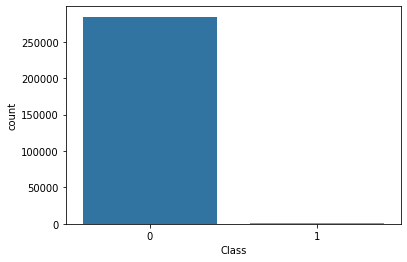

In [6]:
fraud=data[data['Class'].values ==1] #fraud
notfraud=data[data['Class'].values==0] #not fraud
print("Number of fraudulent transactions:{}".format(len(fraud)))
print("Number of Non-fraudulent transactions:{}".format(len(notfraud)))
sns.countplot(x='Class',data=data)

Number of fraudulent transactions is very much less than Number of Non-fraudulent transactions

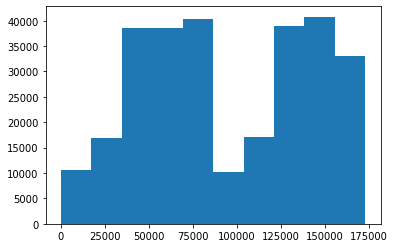

In [7]:
plt.hist(data['Time'],label='Distribution of time')
plt.show()

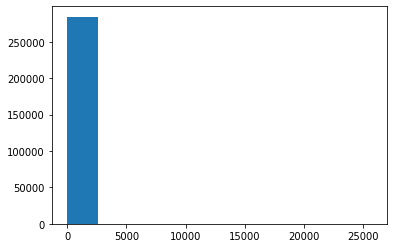

In [8]:
plt.hist(data['Amount'],label='Distribution of amount')
plt.show()

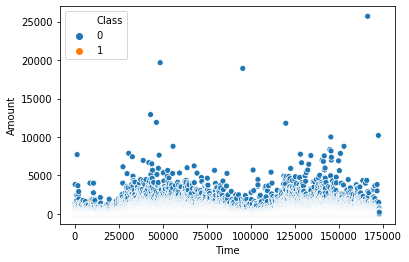

In [33]:
sns.scatterplot(data['Time'],data['Amount'],hue=data['Class'])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [10]:
fraud=data[data['Class'].values ==1] #fraud
print("Statistics of Time gap for fraud transactions")
fraud.Time.describe()

Statistics of Time gap for fraud transactions


count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

In [11]:
print("Statistics of Amount for fraud transactions")
fraud.Amount.describe()

Statistics of Amount for fraud transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
print("Statistics of Time gap for Non fraud transactions")
notfraud.Time.describe()

Statistics of Time gap for Non fraud transactions


count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

In [13]:
print("Statistics of Amount for Non fraud transactions")
notfraud.Amount.describe()

Statistics of Amount for Non fraud transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**Data Preperation** - The selected dataset is clean, so no need to clean it. So let's go for next step.

**Modeling - 1. Logistic Regression model**

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_absolute_error

x=data.iloc[:,:-1]
y=data['Class']

#split data into train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

#Define model
log_model=LogisticRegression(C=1e5,solver='liblinear')
#Fit model
log_model.fit(train_x,train_y)
#predict
log_pred=log_model.predict(test_x)

**Evaluation** - Evaluate Logistic Regression model

In [46]:
#evaluate model
mae=mean_absolute_error(log_pred,test_y)
accuracy=accuracy_score(log_pred,test_y)
confusion=confusion_matrix(log_pred,test_y)
print("Mean Absolute Error:{}\nAccuracy Score:{}\nConfusion Matrix:\n{}".format(mae,accuracy,confusion))
class_report=classification_report(log_pred,test_y)
print("Classification Report:\n{}".format(class_report))

Mean Absolute Error:0.0007958522055639433
Accuracy Score:0.999204147794436
Confusion Matrix:
[[85284    56]
 [   12    91]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85340
           1       0.62      0.88      0.73       103

    accuracy                           1.00     85443
   macro avg       0.81      0.94      0.86     85443
weighted avg       1.00      1.00      1.00     85443



**Modeling - 2. Decision Tree**

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_absolute_error

#Define model
dt_model=DecisionTreeClassifier(random_state=0)
#Fit model
dt_model.fit(train_x,train_y)
#predict
dt_pred=dt_model.predict(test_x)

**Evaluation** - Evaluate Decision Tree Classifier

In [48]:
#evaluate model
mae=mean_absolute_error(dt_pred,test_y)
accuracy=accuracy_score(dt_pred,test_y)
confusion=confusion_matrix(dt_pred,test_y)
print("Mean Absolute Error:{}\nAccuracy Score:{}\nConfusion Matrix:\n{}".format(mae,accuracy,confusion))
class_report=classification_report(dt_pred,test_y)
print("Classification Report:\n{}".format(class_report))

Mean Absolute Error:0.0008075559144692953
Accuracy Score:0.9991924440855307
Confusion Matrix:
[[85264    37]
 [   32   110]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.75      0.77      0.76       142

    accuracy                           1.00     85443
   macro avg       0.87      0.89      0.88     85443
weighted avg       1.00      1.00      1.00     85443



**Modeling - 3. Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_absolute_error

#Define model
rf_model=RandomForestClassifier(random_state=0,n_estimators=10)
#Fit model
rf_model.fit(train_x,train_y)
#predict
rf_pred=rf_model.predict(test_x)

**Evaluation** - Evaluate Random Forest Classifier

In [50]:
#evaluate model
mae=mean_absolute_error(rf_pred,test_y)
accuracy=accuracy_score(rf_pred,test_y)
confusion=confusion_matrix(rf_pred,test_y)
print("Mean Absolute Error:{}\nAccuracy Score:{}\nConfusion Matrix:\n{}".format(mae,accuracy,confusion))
class_report=classification_report(rf_pred,test_y)
print("Classification Report:\n{}".format(class_report))

Mean Absolute Error:0.000550074318551549
Accuracy Score:0.9994499256814484
Confusion Matrix:
[[85288    39]
 [    8   108]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85327
           1       0.73      0.93      0.82       116

    accuracy                           1.00     85443
   macro avg       0.87      0.97      0.91     85443
weighted avg       1.00      1.00      1.00     85443



**Modeling - 4. Naive Bayes**

In [52]:
from sklearn.naive_bayes import GaussianNB

#Define model
gnb_model=GaussianNB()
#Fit model
gnb_model.fit(train_x,train_y)
#predict
gnb_pred=gnb_model.predict(test_x)

**Evaluation** - Evaluate Naive Bayes Model

In [53]:
#evaluate model
mae=mean_absolute_error(gnb_pred,test_y)
accuracy=accuracy_score(gnb_pred,test_y)
confusion=confusion_matrix(gnb_pred,test_y)
print("Mean Absolute Error:{}\nAccuracy Score:{}\nConfusion Matrix:\n{}".format(mae,accuracy,confusion))
class_report=classification_report(gnb_pred,test_y)
print("Classification Report:\n{}".format(class_report))

Mean Absolute Error:0.021534824385847876
Accuracy Score:0.9784651756141521
Confusion Matrix:
[[83480    24]
 [ 1816   123]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83504
           1       0.84      0.06      0.12      1939

    accuracy                           0.98     85443
   macro avg       0.91      0.53      0.55     85443
weighted avg       0.98      0.98      0.97     85443

